#                                      House Price Prediction

## Introduction


                  
                  
                  The House Price Prediction project is a data science endeavor aimed at developing a predictive model that accurately estimates the market value of residential properties. This project leverages a rich dataset containing various features related to houses, such as square footage, location, number of bedrooms and bathrooms, and other pertinent factors that influence house prices. Through advanced data analysis, machine learning, and statistical techniques, our goal is to assist homebuyers, sellers, and real estate professionals in making well-informed decisions.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings("ignore")


## Data Collection & Analysis

Feature Engineering:
    
    Data scientists will engage in comprehensive feature engineering to preprocess and transform raw data. This includes handling missing values, scaling, encoding categorical variables, and selecting relevant features to improve model performance.

In [3]:
## Loading the data set

df=pd.read_csv(r"Documents\house.csv")
df

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176
...,...,...,...,...,...,...,...
4040,14,600.285032,499.92,84.714882,1,2,115050.425194
4041,14,242.912020,1408.20,94.257176,2,34,99862.768731
4042,14,381.986238,1600.48,175.757426,2,64,103316.062406
4043,17,750.971604,402.62,40.985933,1,80,118134.771190


In [6]:
df["bedroom_count"].value_counts()

2     1019
3      764
1      653
4      512
5      310
6      213
7      179
8      145
9      111
10      77
11      43
12       9
13       5
14       3
17       2
Name: bedroom_count, dtype: int64

In [7]:
df.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


In [8]:
## showing the column names 

df.columns

Index(['bedroom_count', 'net_sqm', 'center_distance', 'metro_distance',
       'floor', 'age', 'price'],
      dtype='object')

In [9]:
df.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4045.000000,4045.000000,4045.000000,4045.000000,4045.00000,4045.000000,4045.000000
mean,3.649691,111.628225,1007.115236,89.412340,9.55822,48.360198,95733.956499
std,2.465720,89.459307,578.706749,71.000440,7.70210,28.153029,3770.581749
min,1.000000,-8.499109,10.060000,-168.492932,1.00000,0.000000,84153.485790
25%,2.000000,50.168622,510.630000,39.283508,2.00000,24.000000,93199.037388
50%,3.000000,86.381463,1009.410000,89.031988,8.00000,48.000000,95474.254973
75%,5.000000,144.767416,1493.410000,140.493035,16.00000,72.000000,97863.622299
max,17.000000,750.971604,1999.840000,330.275317,24.00000,97.000000,118134.771190


In [10]:
## number of Rows & Columns

df.shape

(4045, 7)

In [11]:
## count the null values

df.isnull().sum()

bedroom_count      0
net_sqm            0
center_distance    0
metro_distance     0
floor              0
age                0
price              0
dtype: int64

In [12]:
## check the catogorical & numerical variables

df.dtypes

bedroom_count        int64
net_sqm            float64
center_distance    float64
metro_distance     float64
floor                int64
age                  int64
price              float64
dtype: object

In [13]:
## getting the some information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4045 non-null   int64  
 1   net_sqm          4045 non-null   float64
 2   center_distance  4045 non-null   float64
 3   metro_distance   4045 non-null   float64
 4   floor            4045 non-null   int64  
 5   age              4045 non-null   int64  
 6   price            4045 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 221.3 KB


In [14]:
df["bedroom_count"].value_counts()

2     1019
3      764
1      653
4      512
5      310
6      213
7      179
8      145
9      111
10      77
11      43
12       9
13       5
14       3
17       2
Name: bedroom_count, dtype: int64

## Finding the Outliers

A box plot, also known as a box-and-whisker plot, is a graphical representation used in data science and statistics to display the distribution and key summary statistics of a dataset. Box plots provide a concise and informative way to visualize the central tendency, spread, and potential outliers in a dataset.

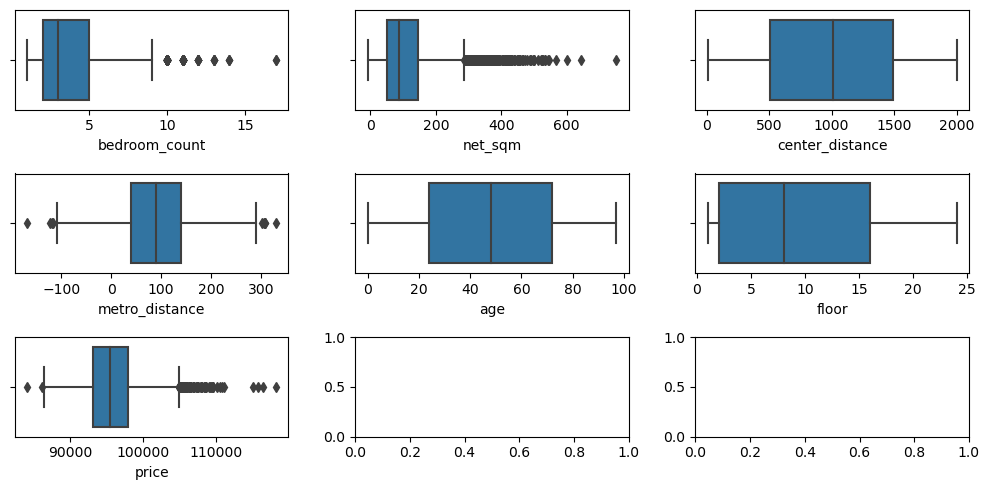

In [15]:


def outliers(data):
    fig,axs=plt.subplots(3,3,figsize=(10,5))
    plt1=sns.boxplot(df["bedroom_count"],ax=axs[0,0])
    plt1=sns.boxplot(df["net_sqm"],ax=axs[0,1])
    plt1=sns.boxplot(df["center_distance"],ax=axs[0,2])
    plt1=sns.boxplot(df["metro_distance"],ax=axs[1,0])
    plt1=sns.boxplot(df["age"],ax=axs[1,1])
    plt1=sns.boxplot(df["floor"],ax=axs[1,2])
    plt1=sns.boxplot(df["price"],ax=axs[2,0])
    plt.tight_layout()
outliers(df)    

## Removing the Outliers

In [16]:
df.shape

(4045, 7)

In [17]:
Q1=df["bedroom_count"].quantile(0.25)
Q3=df["bedroom_count"].quantile(0.75)
IQR=Q3-Q1
df=df[(df["bedroom_count"]>=Q1-1.5*IQR)&(df["bedroom_count"]<=Q3+1.5*IQR)]

In [18]:
Q1=df["net_sqm"].quantile(0.25)
Q3=df["net_sqm"].quantile(0.75)
df=df[(df["net_sqm"]>=Q1-1.5*IQR)&(df["net_sqm"]<=Q3+1.5*IQR)]

In [19]:
Q1=df["metro_distance"].quantile(0.25)
Q3=df["metro_distance"].quantile(0.75)
df=df[(df["metro_distance"]>=Q1-1.5*IQR)&(df["metro_distance"]<=Q3+1.5*IQR)]

In [20]:
Q1=df["price"].quantile(0.25)
Q3=df["price"].quantile(0.75)
df=df[(df["price"]>=Q1-1.5*IQR)&(df["price"]<=Q3+1.5*IQR)]

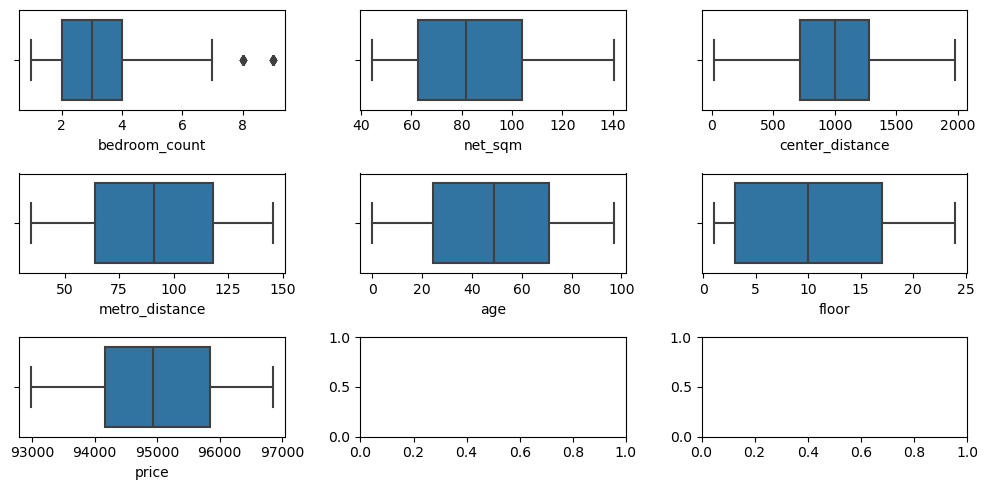

In [21]:
outliers(df)  

In [22]:
y=df["price"]
x=df[["bedroom_count","net_sqm","center_distance","metro_distance","floor","age"]]

In [23]:
x

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age
27,1,55.555208,661.01,50.131707,20,65
38,1,51.174872,730.03,46.336359,20,81
50,1,77.619826,1498.58,90.098872,7,61
57,1,58.538837,1097.05,113.858095,11,8
76,1,59.972506,1093.92,54.912943,19,85
...,...,...,...,...,...,...
3852,9,66.831308,683.94,105.241152,1,33
3869,9,124.073363,610.72,43.189634,2,69
3888,9,109.858189,1237.29,129.454136,1,73
3889,9,131.520021,972.61,72.899295,1,81


## Split the Dataset

Splitting corpus into trainig and test set.for this,we need class train_test_split from sklearn cross,validation,split.split can be made 70/30 or 80/20 or 75/25. here, i choose 75/25 via "test_size".X is the bag of words.y is 0 or 1(positivr or negative)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

# Linear Regression

## Find the predicted values

 Once the model is trained and evaluated, it can be used to make predictions on new, unseen data. These predictions provide valuable insights and can be used for decision-making, such as pricing houses, diagnosing diseases, or making recommendations.

In [25]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)
y_predict=regression.predict(x_test)
model_results=pd.DataFrame({"actual values":y_test,"lr predicted values":y_predict})


In [26]:
model_results

,actual values,lr predicted values
1737,95173.012051,95096.324073
3533,95960.892341,96111.977204
2213,94323.005616,93933.986906
1604,93741.430128,94196.855640
1626,93271.913360,93941.646333
...,...,...
986,94709.429218,94491.375984
849,96386.756126,94801.049857
1893,94797.785577,95560.186516
859,96484.207601,95380.620766


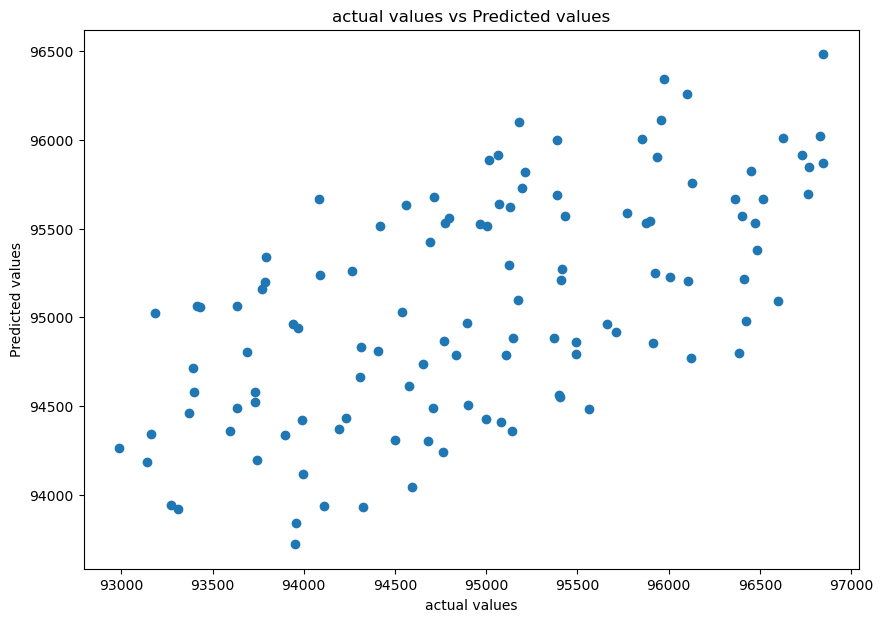

In [27]:
# Prediction Plot
plt.figure(figsize=(10,7))
plt.scatter(y_test,y_predict)
plt.xlabel("actual values")
plt.ylabel("Predicted values")
plt.title("actual values vs Predicted values")
plt.show()


## Model Evolution


                         A variety of machine learning algorithms will be applied and evaluated to determine the most suitable model for the task. We will assess the model's performance using metrics such as Mean Squared Error(MSE), Mean Absolute Error (MAE), Root Mean Square Error (RMSE),Mean Absolute Percentage Error(MAPE) and R-squared.

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

In [29]:
mse=mean_squared_error(y_test,y_predict,squared=True)
mae=mean_absolute_error(y_test,y_predict)
rmse=mean_squared_error(y_test,y_predict,squared=False)
mape=mean_absolute_percentage_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)

In [30]:
print("Mean Squared Error :",mse)
print("\n")
print("Mean Absolute Error :",mae)
print("\n")
print("Root Mean Squuared Error :",rmse)
print("\n")
print("Mean Absolute Percentage Error :",mape)
print("\n")
print("R-Squared :",r2)

Mean Squared Error : 679678.2006160687


Mean Absolute Error : 701.5699149582076


Root Mean Squuared Error : 824.4259824969545


Mean Absolute Percentage Error : 0.007396462334950682


R-Squared : 0.36826707210633025


## Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_model= DecisionTreeRegressor()
decision_tree_model.fit(x_train,y_train)
y_prediction_tree=decision_tree_model.predict(x_train)

y_prediction_tree_test=decision_tree_model.predict(x_test)
y_prediction_tree_test

mse_=mean_squared_error(y_test,y_prediction_tree_test,squared=True)
mae_=mean_absolute_error(y_test,y_prediction_tree_test)
rmse_=mean_squared_error(y_test,y_prediction_tree_test,squared=False)
mape_=mean_absolute_percentage_error(y_test,y_prediction_tree_test)
r2_=r2_score(y_test,y_prediction_tree_test)


In [32]:
model_results=pd.DataFrame({"actual values":y_test,"dtr predicted values":y_prediction_tree_test})
model_results

,actual values,dtr predicted values
1737,95173.012051,96847.860536
3533,95960.892341,96555.101406
2213,94323.005616,94718.318902
1604,93741.430128,94679.708772
1626,93271.913360,93516.348183
...,...,...
986,94709.429218,94654.251847
849,96386.756126,95570.995055
1893,94797.785577,94527.934435
859,96484.207601,95157.201126


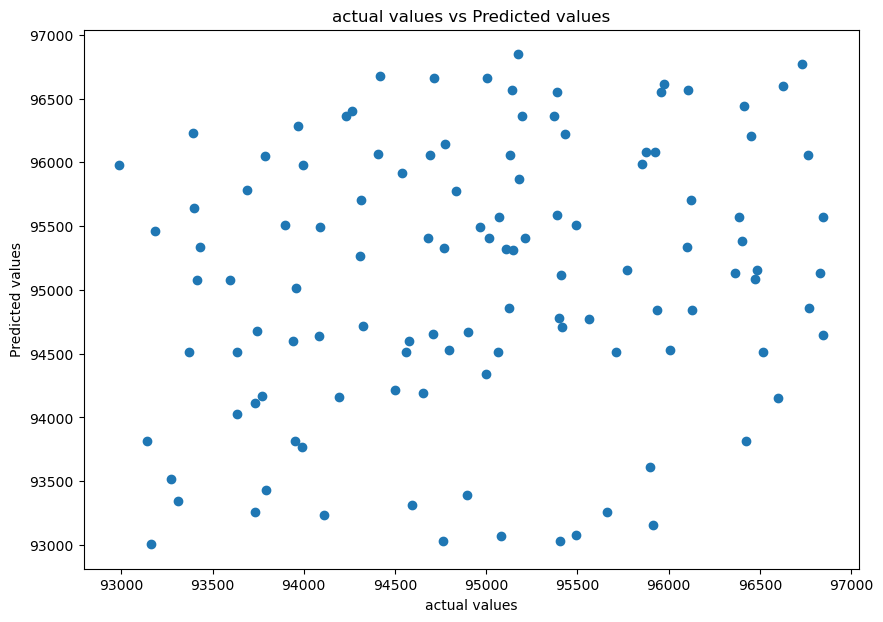

In [33]:
# Prediction Plot
plt.figure(figsize=(10,7))
plt.scatter(y_test,y_prediction_tree_test)
plt.xlabel("actual values")
plt.ylabel("Predicted values")
plt.title("actual values vs Predicted values")
plt.show()


In [34]:
print("Mean Squared Error :",mse_)
print("\n")
print("Mean Absolute Error :",mae_)
print("\n")
print("Root Mean Squuared Error :",rmse_)
print("\n")
print("Mean Absolute Percentage Error :",mape_)
print("\n")
print("R-Squared :",r2_)

Mean Squared Error : 1735104.2925525317


Mean Absolute Error : 1057.2533986946721


Root Mean Squuared Error : 1317.2335755485933


Mean Absolute Percentage Error : 0.011138367180059382


R-Squared : -0.612708063818358


## Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model=RandomForestRegressor(n_estimators=200, random_state=7)
random_forest_model.fit(x_train,y_train)

y_prediction_random_forest=random_forest_model.predict(x_train)

y_prediction_random_forest_test=random_forest_model.predict(x_test)

rft_mse=mean_squared_error(y_test,y_prediction_tree_test,squared=True)
rft_mae=mean_absolute_error(y_test,y_prediction_tree_test)
rft_rmse=mean_squared_error(y_test,y_prediction_tree_test,squared=False)
rft_mape=mean_absolute_percentage_error(y_test,y_prediction_tree_test)
rft_r2=r2_score(y_test,y_prediction_tree_test)


In [36]:
model_results=pd.DataFrame({"actual values":y_test,"rfr predicted values":y_prediction_random_forest_test})
model_results

,actual values,rfr predicted values
1737,95173.012051,95951.769988
3533,95960.892341,95752.337765
2213,94323.005616,94393.265550
1604,93741.430128,94339.111311
1626,93271.913360,93877.990793
...,...,...
986,94709.429218,94635.571908
849,96386.756126,95046.084216
1893,94797.785577,95709.636178
859,96484.207601,95576.435378


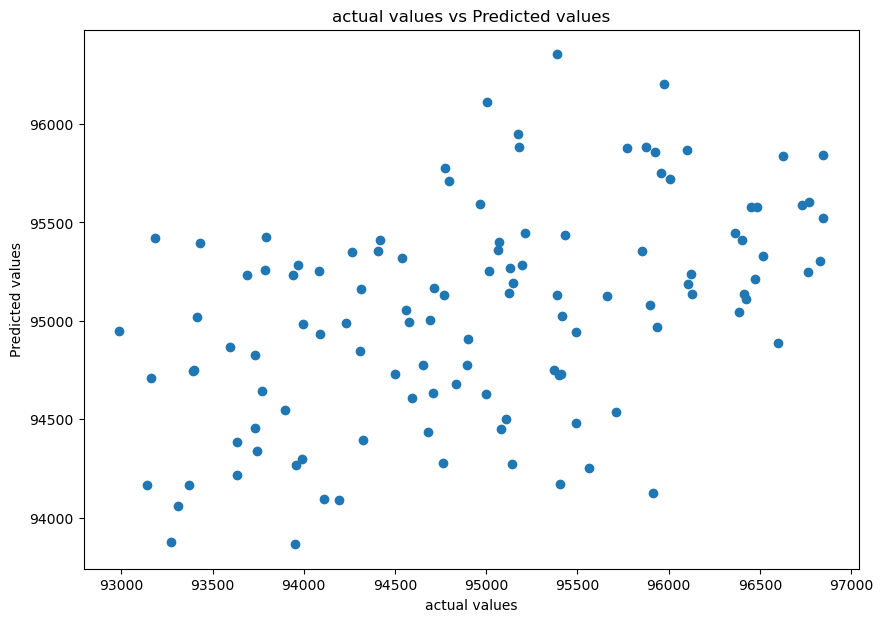

In [37]:
# Prediction Plot
plt.figure(figsize=(10,7))
plt.scatter(y_test,y_prediction_random_forest_test)
plt.xlabel("actual values")
plt.ylabel("Predicted values")
plt.title("actual values vs Predicted values")
plt.show()


In [38]:
print("Mean Squared Error :",rft_mse)
print("\n")
print("Mean Absolute Error :",rft_mae)
print("\n")
print("Root Mean Squuared Error :",rft_rmse)
print("\n")
print("Mean Absolute Percentage Error :",rft_mape)
print("\n")
print("R-Squared :",rft_r2)


Mean Squared Error : 1735104.2925525317


Mean Absolute Error : 1057.2533986946721


Root Mean Squuared Error : 1317.2335755485933


Mean Absolute Percentage Error : 0.011138367180059382


R-Squared : -0.612708063818358


In [39]:
df=pd.DataFrame({"actual values":y_test,"lr predicted values":y_predict,"dtr predicted values":y_prediction_tree_test,"rfr predicted values":y_prediction_random_forest_test})
df

,actual values,lr predicted values,dtr predicted values,rfr predicted values
1737,95173.012051,95096.324073,96847.860536,95951.769988
3533,95960.892341,96111.977204,96555.101406,95752.337765
2213,94323.005616,93933.986906,94718.318902,94393.265550
1604,93741.430128,94196.855640,94679.708772,94339.111311
1626,93271.913360,93941.646333,93516.348183,93877.990793
...,...,...,...,...
986,94709.429218,94491.375984,94654.251847,94635.571908
849,96386.756126,94801.049857,95570.995055,95046.084216
1893,94797.785577,95560.186516,94527.934435,95709.636178
859,96484.207601,95380.620766,95157.201126,95576.435378


In [40]:
# open a fie, where you want to store the data
file=open("house prediction web.pkl","wb")
 
# dump information to the file    
pickle.dump(decision_tree_model,file)